# Self Organizing Maps (SOM)
### Dataset: [A3-data.txt](../../input/A3-data.txt)



<a id="1"></a>
## Import modules

In [6]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.cluster import SpectralClustering
from sklearn.cluster import AffinityPropagation
from minisom import MiniSom
import matplotlib as mpl


<a id="2"></a>
## Loading dataset

In [7]:
filename = '../../input/A3-data.txt'
df = pd.read_csv(filename, delimiter=',', header=0)

dataset_1 = df.to_numpy()

dataset_1[:, :-1] = (dataset_1[:, :-1] - np.mean(dataset_1[:, :-1], axis=0)) / np.std(dataset_1[:, :-1], axis=0)

print(dataset_1.shape)
print(np.min(dataset_1, axis=0))

(360, 5)
[-2.25620249 -2.16568552 -2.11316192 -2.30227955  1.        ]


<a id="3"></a>
## Standardize the data

 [ 5000 / 5000 ] 100% - 0:00:00 left 
 quantization error: 0.3812296192159205


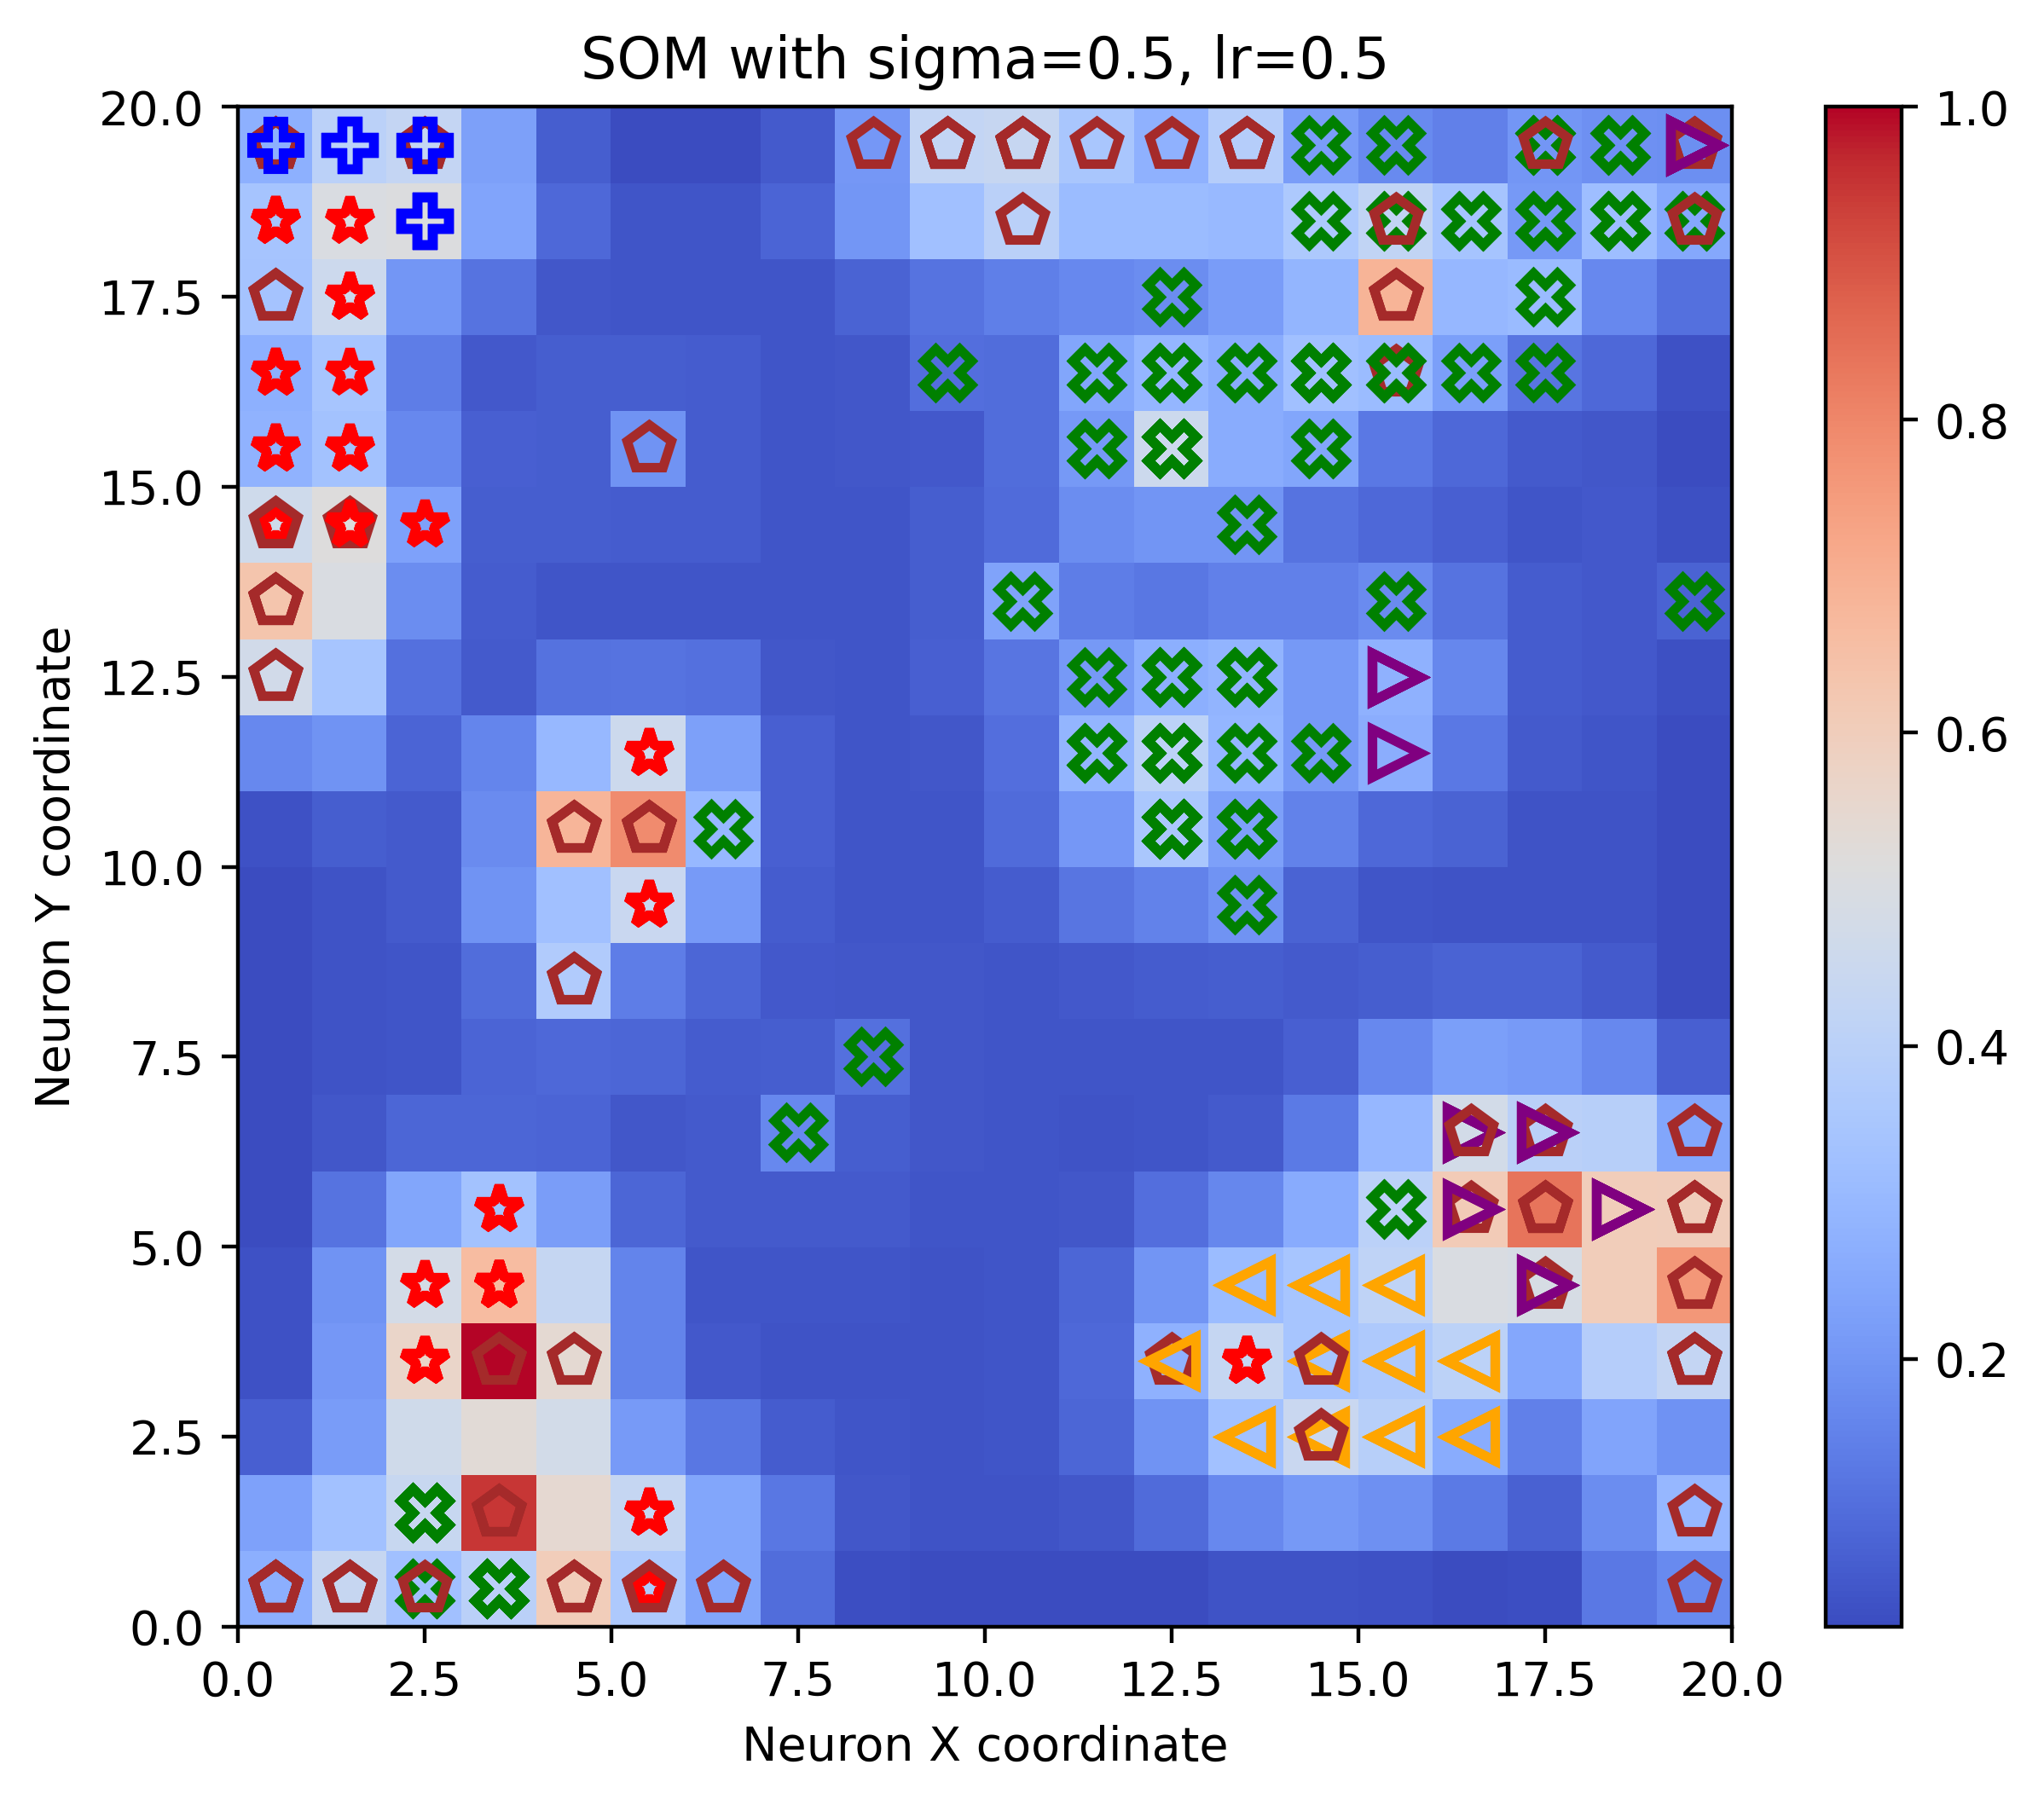

In [10]:
training_data = dataset_1[:, :-1] 
target = np.array(dataset_1[:, -1], dtype=np.uint8) 

# Define SOM parameters
parameters_to_try = [
    {"sigma": 0.5, "learning_rate": 0.5, "neighborhood_function": "gaussian", "topology": "rectangular"},
    # Add other parameter sets as needed
]

plt.figure(figsize=(12, 10))

for i, params in enumerate(parameters_to_try):
    plt.subplot(2, 2, i + 1)
    n_neurons = 20
    m_neurons = 20
    som = MiniSom(n_neurons, m_neurons, training_data.shape[1], random_seed=42, **params)

    som.pca_weights_init(training_data)
    som.train(training_data, 5000, verbose=True)

    plt.pcolor(som.distance_map().T, cmap='coolwarm')  
    plt.colorbar()

    markers = ['*', 'X', 'P', '>', '<', 'p', 'H']
    colors = ['red', 'green', 'blue', 'purple', 'orange', 'brown', 'pink']
    for cnt, xx in enumerate(training_data):
        w = som.winner(xx)
        plt.plot(w[0]+.5, w[1]+.5, markers[target[cnt]-1], markerfacecolor='None',
                 markeredgecolor=colors[target[cnt]-1], markersize=10, markeredgewidth=2)

    plt.title(f'SOM with sigma={params["sigma"]}, lr={params["learning_rate"]}')
    plt.xlabel('Neuron X coordinate')
    plt.ylabel('Neuron Y coordinate')

plt.tight_layout()
plt.show()

### Connection to the First Plot with Data Points


This plot shows the SOM's distance map, often visualized as a heatmap. The distance map represents the distances between neighboring neurons' weights, giving an idea of how similar or different adjacent neurons are.
Superimposed on this map are the data points, where each point's position corresponds to the neuron to which it is most similar (its "winning" neuron).
The points are colored based on their class labels, offering a visual representation of how different classes are distributed across the map.

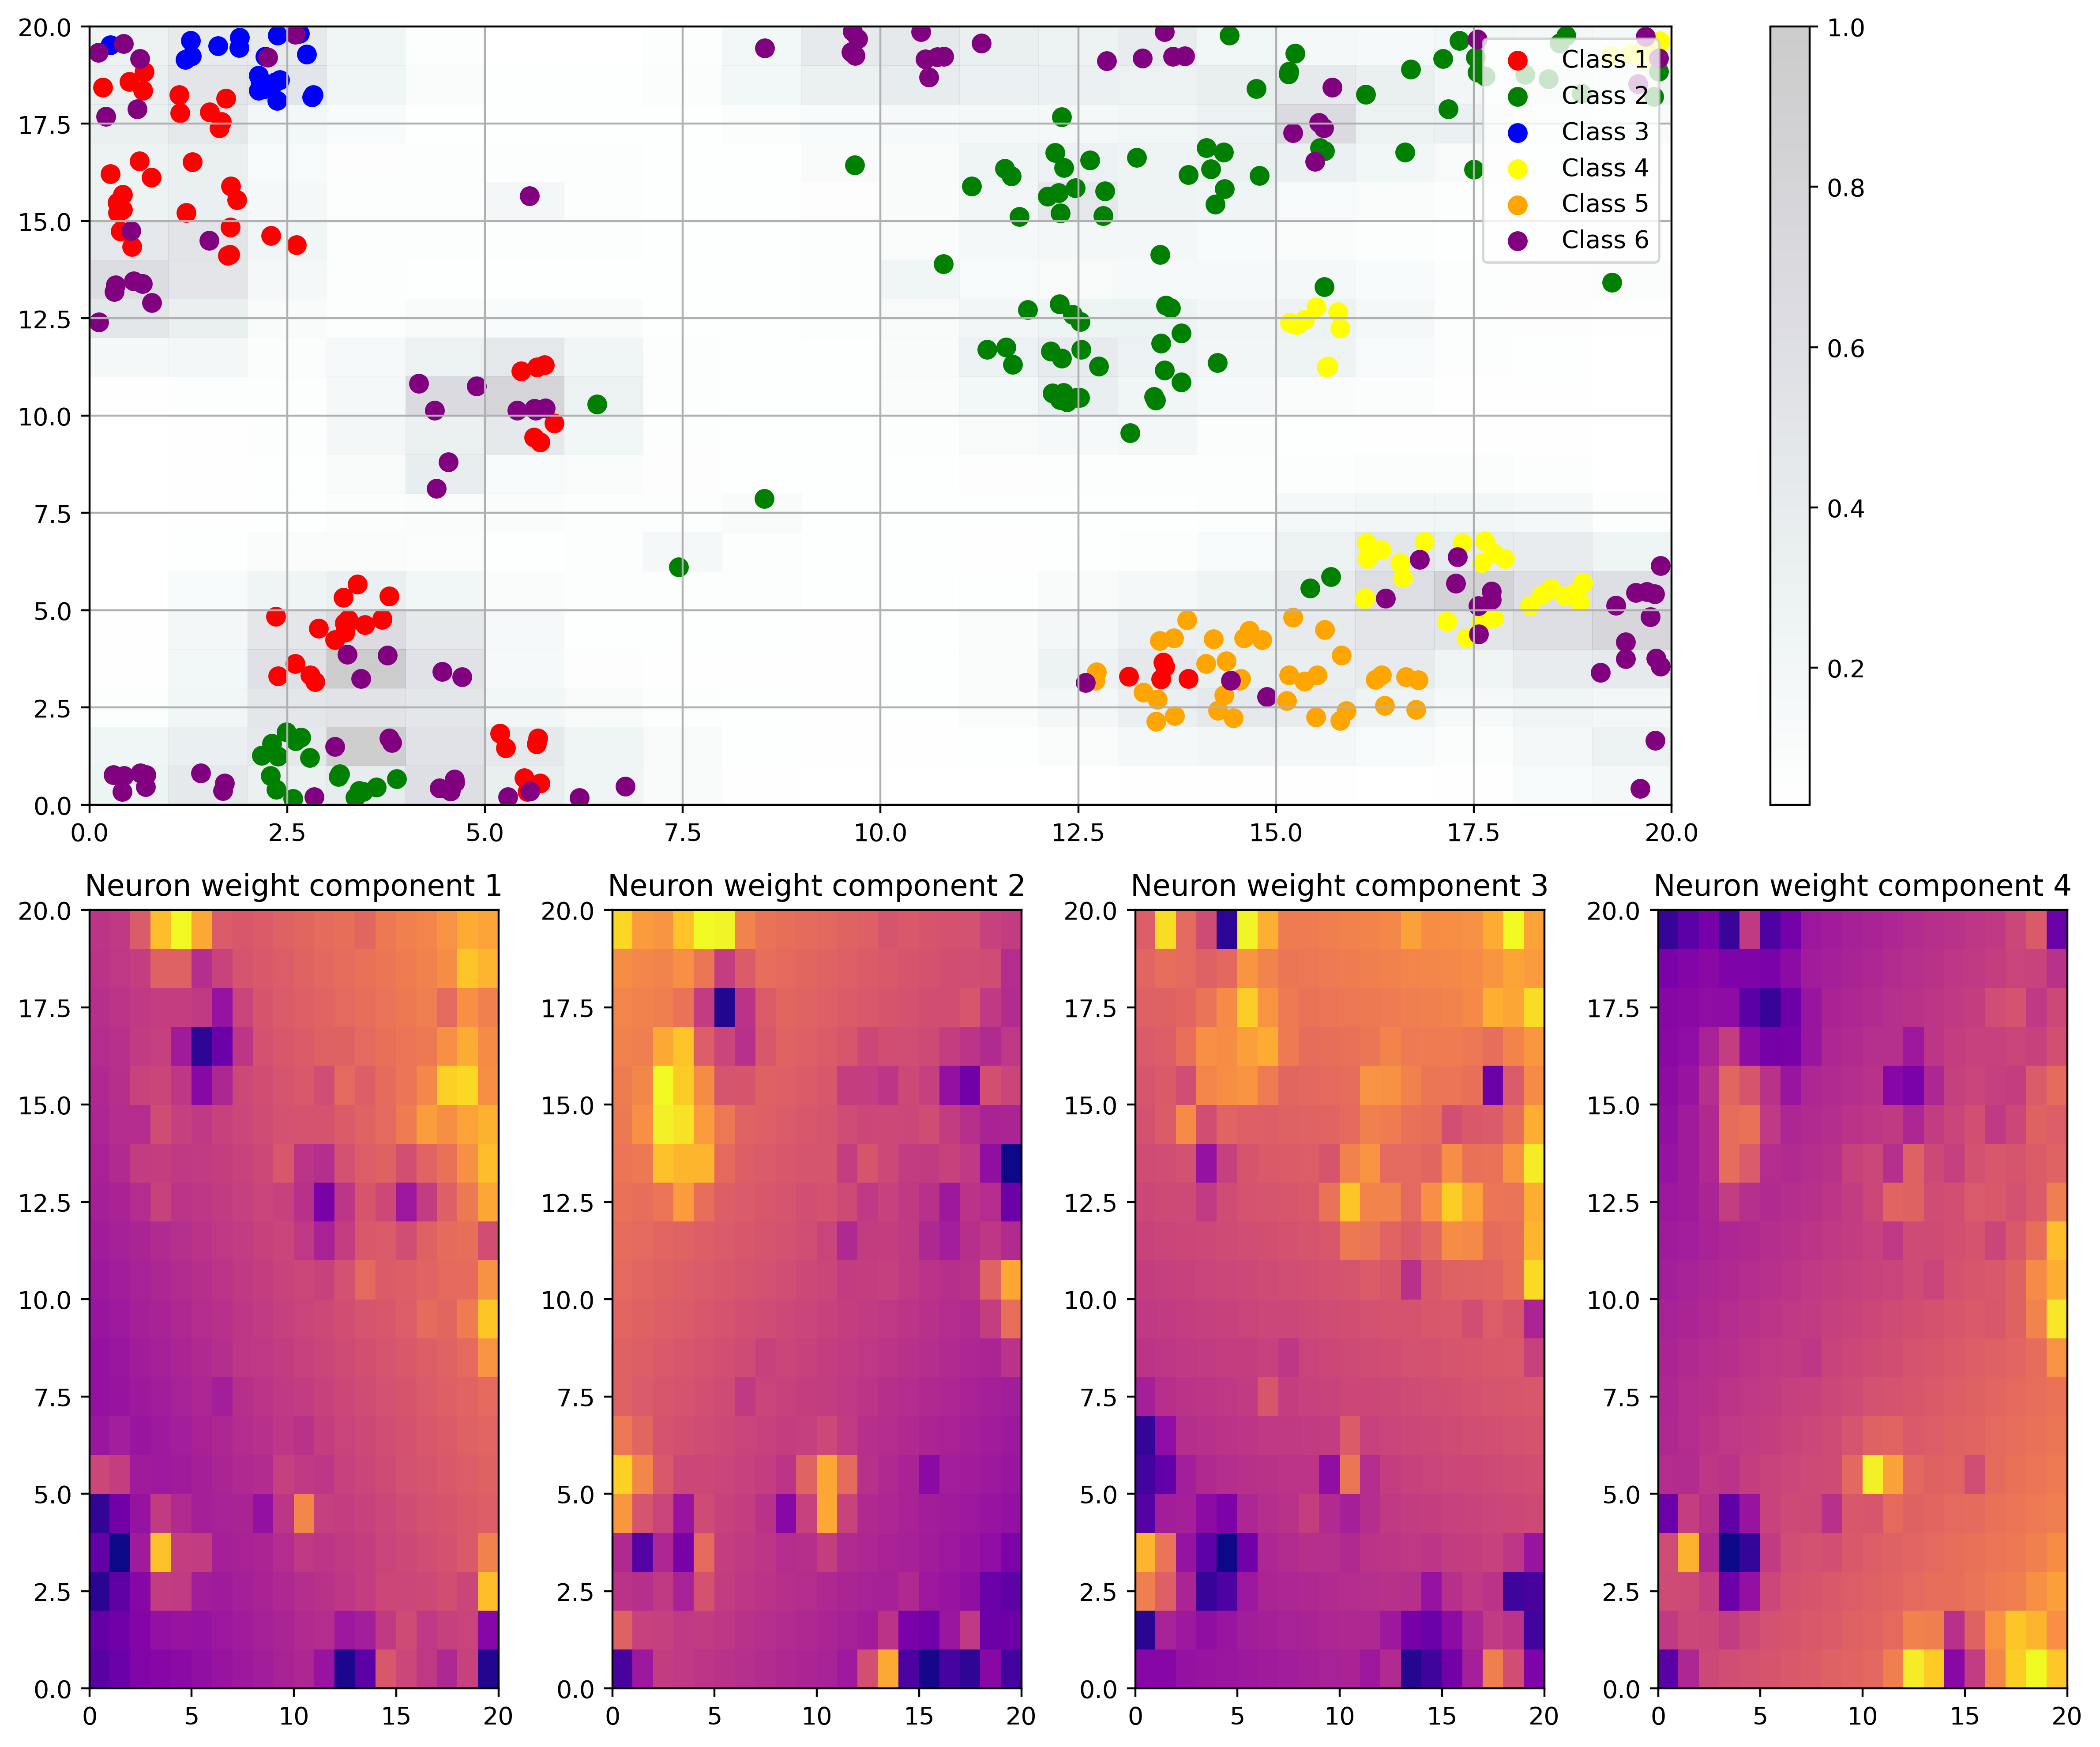

In [11]:
w_x, w_y = zip(*[som.winner(d) for d in training_data])
w_x = np.array(w_x)
w_y = np.array(w_y)

colors = ['red', 'green', 'blue', 'yellow', 'orange', 'purple', 'pink']
label_names = ['Class 1', 'Class 2', 'Class 3', 'Class 4', 'Class 5', 'Class 6', 'Class 7']

plt.figure(figsize=(12, 10))
plt.subplot(2, 1, 1)  # SOM distance map and data points
plt.pcolor(som.distance_map().T, cmap='bone_r', alpha=0.2)
plt.colorbar()

for c in np.unique(target):
    idx_target = target == c
    plt.scatter(w_x[idx_target] + 0.5 + (np.random.rand(np.sum(idx_target)) - 0.5) * 0.8,
                w_y[idx_target] + 0.5 + (np.random.rand(np.sum(idx_target)) - 0.5) * 0.8,
                s=50, c=colors[c-1], label=label_names[c-1])

plt.legend(loc='upper right')
plt.grid()

w = som.get_weights()
for i in range(4):
    plt.subplot(2, 4, 5 + i)
    plt.pcolor(w[:, :, i], cmap='plasma')
    plt.title(f'Neuron weight component {i+1}')

plt.tight_layout()
plt.show()

The neuron weight components give a detailed view of what each neuron has learned about the input features, while the first plot shows how these learned features collectively organize the input data (with class labels) on the map. Understanding both helps in comprehensively interpreting the results of the SOM.